In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the dataset
df = pd.read_csv('housing.csv')

In [3]:
df.shape

(20640, 10)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
(207/20640) *100

1.002906976744186

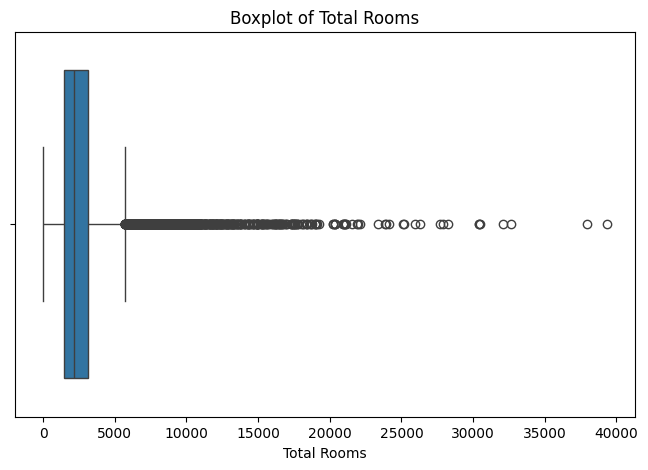

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["total_rooms"])

# Add title and labels
plt.title("Boxplot of Total Rooms")
plt.xlabel("Total Rooms")

# Show plot
plt.show()

In [16]:
df_cleaned = df.dropna()
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [29]:
duplicates = df_cleaned.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


In [18]:
print(df.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [19]:
invalid_ages = df[df["housing_median_age"] < 0]
print(invalid_ages)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [20]:
print(df["ocean_proximity"].unique())


['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [21]:
invalid_rows = df[df["total_bedrooms"] > df["total_rooms"]]
print(f"Rows where total_bedrooms > total_rooms: {len(invalid_rows)}")

Rows where total_bedrooms > total_rooms: 0


In [30]:
# Perform one-hot encoding on 'ocean_proximity' (replace with your categorical column)
df_one_encoded = pd.get_dummies(df_cleaned, columns=["ocean_proximity"], drop_first=True)

# Display first few rows
df_one_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply label encoding to 'ocean_proximity' column
df_encoded = df_cleaned.copy()  # Create a copy to store encoded data
df_encoded["ocean_proximity_encoded"] = encoder.fit_transform(df_encoded["ocean_proximity"])

# Drop the original 'ocean_proximity' column if needed
df_encoded = df_encoded.drop(columns=["ocean_proximity"])

# Display first few rows of the new dataset
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [37]:
numerical_df = df_cleaned.select_dtypes(include=["number"])

# Calculate min, max, and range
min_values = numerical_df.min()
max_values = numerical_df.max()
range_values = max_values - min_values

# Create DataFrame for results
range_df = pd.DataFrame({"Min": min_values, "Max": max_values, "Range": range_values})

# Display results
print(range_df)

                           Min          Max        Range
longitude            -124.3500    -114.3100      10.0400
latitude               32.5400      41.9500       9.4100
housing_median_age      1.0000      52.0000      51.0000
total_rooms             2.0000   39320.0000   39318.0000
total_bedrooms          1.0000    6445.0000    6444.0000
population              3.0000   35682.0000   35679.0000
households              1.0000    6082.0000    6081.0000
median_income           0.4999      15.0001      14.5002
median_house_value  14999.0000  500001.0000  485002.0000


In [38]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ["housing_median_age", "total_rooms", "total_bedrooms", 
                    "population", "households", "median_income", "median_house_value"]

scaler = StandardScaler()

df_standard = df_cleaned.copy()

df_standard[columns_to_scale] = scaler.fit_transform(df_standard[columns_to_scale])

df_standard.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,NEAR BAY
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,NEAR BAY
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,NEAR BAY
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,NEAR BAY
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,NEAR BAY


In [36]:
numerical_df = df_standard.select_dtypes(include=["number"])

# Calculate min, max, and range
min_values = numerical_df.min()
max_values = numerical_df.max()
range_values = max_values - min_values

# Create DataFrame for results
range_df = pd.DataFrame({"Min": min_values, "Max": max_values, "Range": range_values})

# Display results
print(range_df)

                                Min         Max      Range
longitude               -124.350000 -114.310000  10.040000
latitude                  32.540000   41.950000   9.410000
housing_median_age        -2.196180    1.856182   4.052362
total_rooms               -1.207283   16.815580  18.022863
total_bedrooms            -1.274093   14.018707  15.292800
population                -1.256123   30.250330  31.506453
households                -1.303984   14.601520  15.905504
median_income             -1.774299    5.858286   7.632585
median_house_value        -1.662641    2.540411   4.203052
ocean_proximity_encoded    0.000000    4.000000   4.000000


In [44]:
# Perform one-hot encoding on 'ocean_proximity' (replace with your categorical column)
df_one_encoded = pd.get_dummies(df_standard, columns=["ocean_proximity"], drop_first=False)

# Display first few rows
df_one_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,False,False,False,True,False
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,False,False,False,True,False
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,False,False,False,True,False
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,False,False,False,True,False
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,False,False,False,True,False


                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924616           -0.109357   
latitude                    -0.924616  1.000000            0.011899   
housing_median_age          -0.109357  0.011899            1.000000   
total_rooms                  0.045480 -0.036667           -0.360628   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.100270 -0.108997           -0.295787   
households                   0.056513 -0.071774           -0.302768   
median_income               -0.015550 -0.079626           -0.118278   
median_house_value          -0.045398 -0.144638            0.106432   
ocean_proximity_<1H OCEAN    0.320831 -0.446928            0.045553   
ocean_proximity_INLAND      -0.055337  0.351084           -0.236968   
ocean_proximity_ISLAND       0.009501 -0.016662            0.017105   
ocean_proximity_NEAR BAY    -0.474714  0.358785            0.256149   
ocean_

<Axes: >

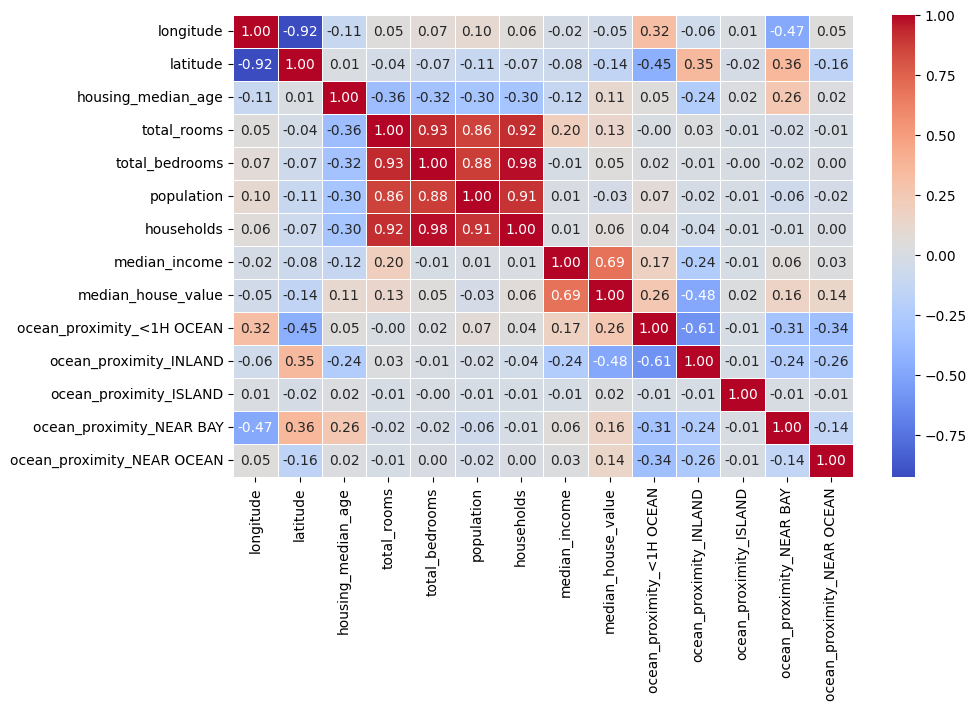

In [45]:
correlation_matrix_one = df_one_encoded.corr()

print(correlation_matrix_one)
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix_one, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [41]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Apply label encoding to 'ocean_proximity' column
df_encoded = df_standard.copy()  # Create a copy to store encoded data
df_encoded["ocean_proximity_encoded"] = encoder.fit_transform(df_encoded["ocean_proximity"])

# Drop the original 'ocean_proximity' column if needed
df_encoded = df_encoded.drop(columns=["ocean_proximity"])

# Display first few rows of the new dataset
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-122.23,37.88,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,3
1,-122.22,37.86,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,3
2,-122.24,37.85,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,3
3,-122.25,37.85,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,3
4,-122.25,37.85,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,3


                         longitude  latitude  housing_median_age  total_rooms  \
longitude                 1.000000 -0.924616           -0.109357     0.045480   
latitude                 -0.924616  1.000000            0.011899    -0.036667   
housing_median_age       -0.109357  0.011899            1.000000    -0.360628   
total_rooms               0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms            0.069608 -0.066983           -0.320451     0.930380   
population                0.100270 -0.108997           -0.295787     0.857281   
households                0.056513 -0.071774           -0.302768     0.918992   
median_income            -0.015550 -0.079626           -0.118278     0.197882   
median_house_value       -0.045398 -0.144638            0.106432     0.133294   
ocean_proximity_encoded  -0.289530  0.200801            0.112330    -0.015363   

                         total_bedrooms  population  households  \
longitude                      0.069608  

<Axes: >

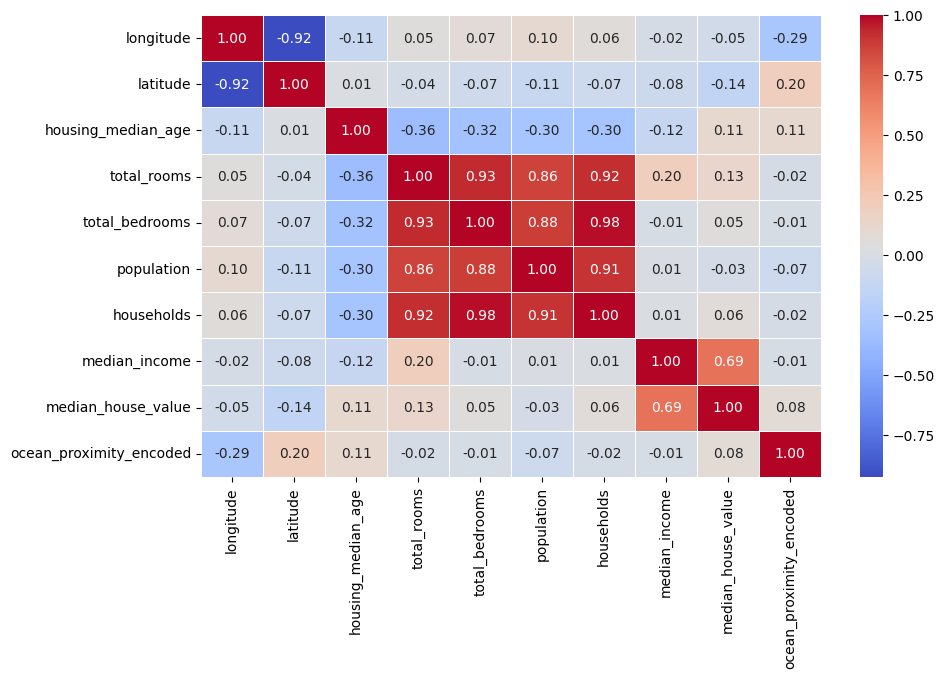

In [42]:
correlation_matrix = df_encoded.corr()

print(correlation_matrix)
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [46]:
# Select only important features
selected_features = ["median_income", "population"]

# Create new DataFrame with selected features
df_selected = df_encoded[selected_features]

# Display first few rows
df_selected.head()

,median_income,population
0,2.345163,-0.973320
1,2.332632,0.861339
2,1.782939,-0.819769
3,0.932970,-0.765056
4,-0.013143,-0.758879


In [69]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["median_house_value"])  # Remove target column
y = df_encoded["median_house_value"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (16346, 9)
Testing Features Shape: (4087, 9)
Training Target Shape: (16346,)
Testing Target Shape: (4087,)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred) ** 0.5  
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.42829996901115586
R² Score: 0.8212599856105299


In [63]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display first few rows
print(results_df.head())

         Actual  Predicted
14416  0.337301   0.276513
16383 -0.597442  -0.459171
7731   0.098201  -0.112666
1410   0.120725  -0.599894
1335  -0.315027  -0.379705


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Compute RMSE manually
r2 = r2_score(y_test, y_pred)  # R² Score

# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display first few rows
print(results_df.head())

# Print evaluation metrics
print("\n🔹 RMSE:", rmse)
print("🔹 R² Score:", r2)


         Actual  Predicted
14416  0.337301   0.276513
16383 -0.597442  -0.459171
7731   0.098201  -0.112666
1410   0.120725  -0.599894
1335  -0.315027  -0.379705

🔹 RMSE: 0.42829996901115586
🔹 R² Score: 0.8212599856105299


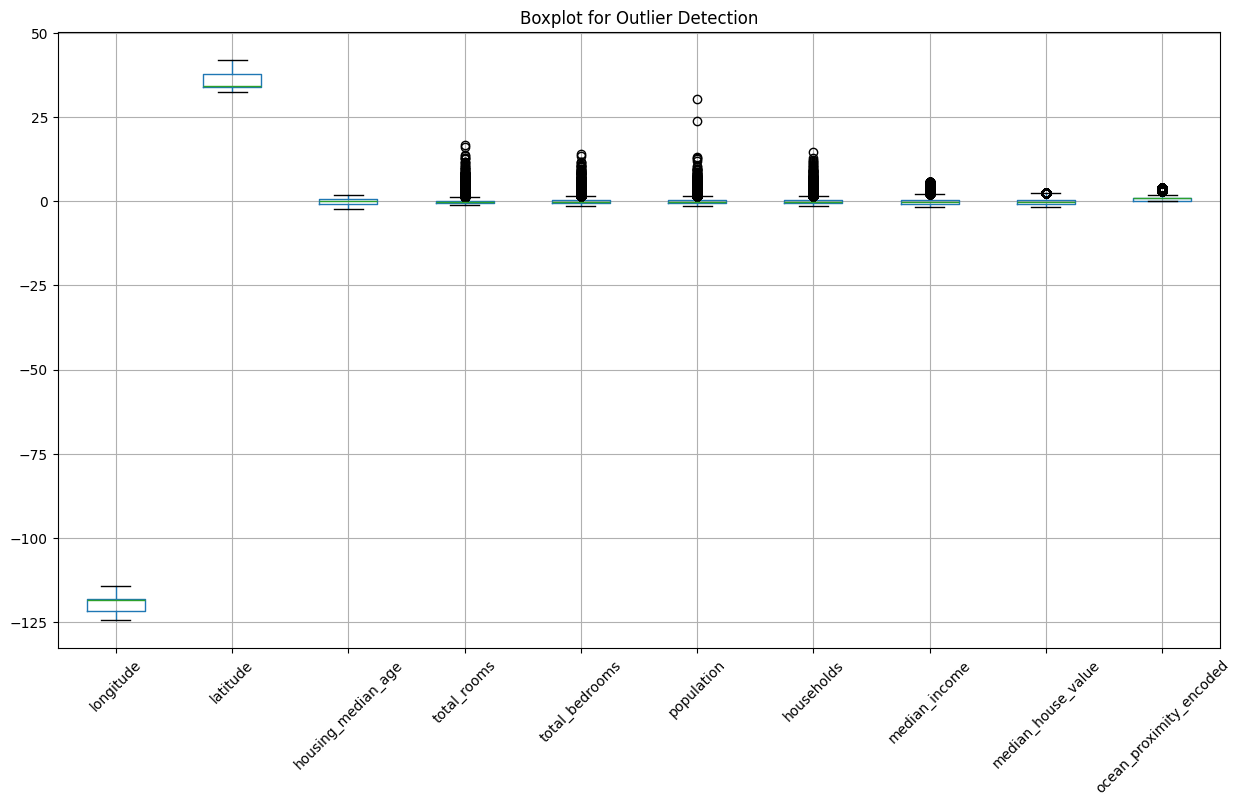

In [65]:
plt.figure(figsize=(15, 8))
df_encoded.select_dtypes(include=["float64", "int64"]).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [66]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # First quartile (25th percentile)
    Q3 = data.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

# Apply function to all numerical columns
outliers = df_encoded.select_dtypes(include=["float64", "int64"]).apply(detect_outliers_iqr)
print("🔹 Number of Outliers in Each Column:\n", outliers)

🔹 Number of Outliers in Each Column:
 longitude                     0
latitude                      0
housing_median_age            0
total_rooms                1290
total_bedrooms             1271
population                 1190
households                 1212
median_income               670
median_house_value         1064
ocean_proximity_encoded    4898
dtype: int64


🔹 Skewness of Numerical Columns:
 longitude                 -0.297801
latitude                   0.465953
housing_median_age         0.060331
total_rooms                4.147343
total_bedrooms             3.459546
population                 4.935858
households                 3.410438
median_income              1.646657
median_house_value         0.977763
ocean_proximity_encoded    1.016286
dtype: float64


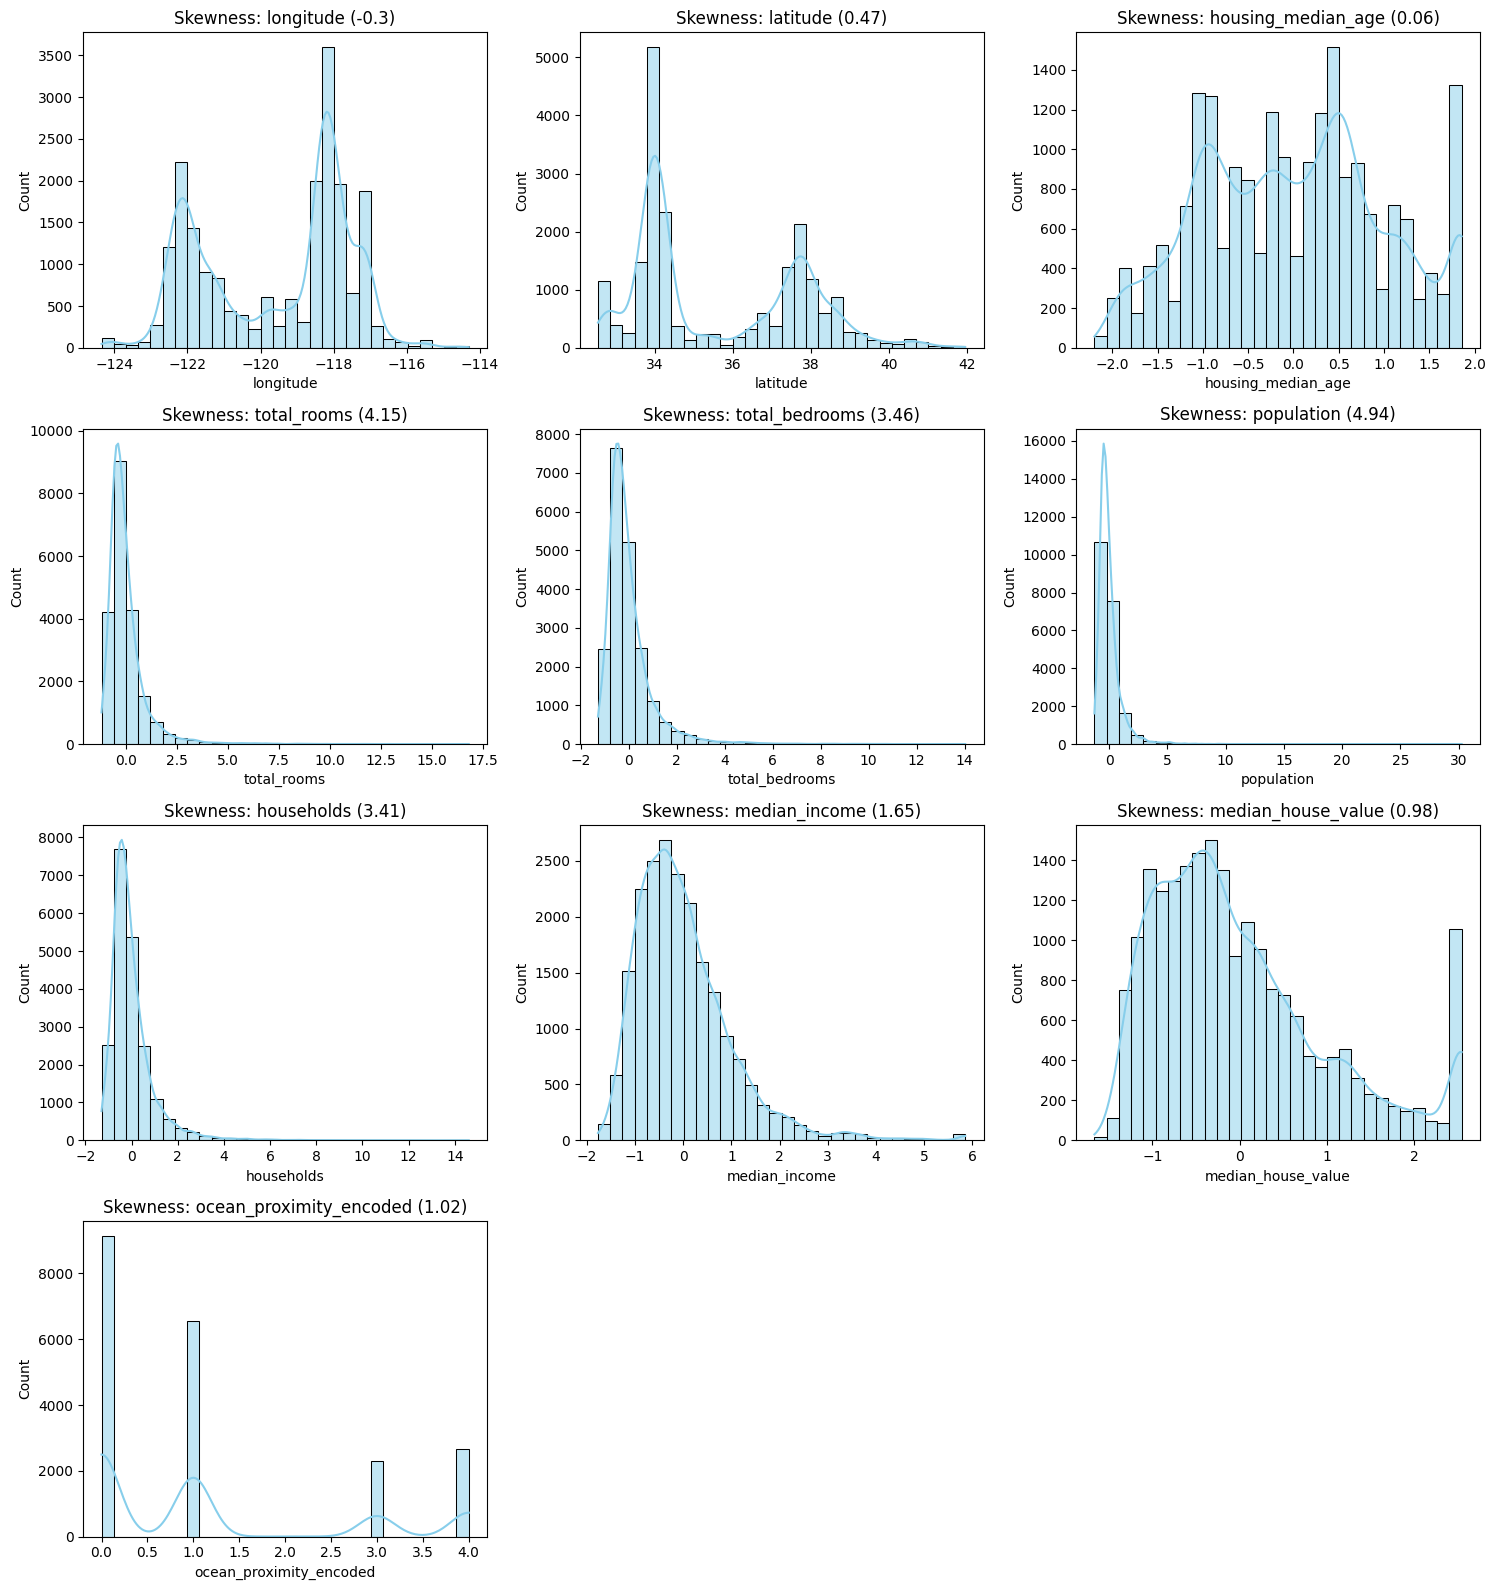

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Compute skewness
skewness = df.select_dtypes(include=["float64", "int64"]).skew()
print("🔹 Skewness of Numerical Columns:\n", skewness)

# Get all numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Define grid size dynamically
num_features = len(num_cols)
rows = math.ceil(num_features / 3)  # Auto adjust rows
cols = min(3, num_features)  # Max 3 columns per row

# Plot histograms with KDE
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Skewness: {col} ({round(skewness[col], 2)})")

plt.tight_layout()
plt.show()


In [68]:
df_transformed = df.copy()

# Columns that need transformation
cols_to_transform = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

# Apply log transformation (Adding 1 to avoid log(0) error)
df_transformed[cols_to_transform] = np.log1p(df_transformed[cols_to_transform])

# Verify new skewness after transformation
print("🔹 New Skewness After Log Transformation:\n", df_transformed[cols_to_transform].skew())

# Now df_transformed contains the transformed data separately


🔹 New Skewness After Log Transformation:
 total_rooms      -1.006814
total_bedrooms   -1.016467
population       -1.010285
households       -0.919761
median_income    -1.431336
dtype: float64


c:\Users\DYNABOOK\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [71]:
df_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,0.982143,-1.633828,-3.517458,-3.666281,-3.773691,1.207397,2.129631,NEAR BAY,3
1,-122.22,37.86,-0.607019,1.113793,0.853681,0.621350,0.982064,1.203644,1.314156,NEAR BAY,3
2,-122.24,37.85,1.856182,-0.767323,-1.746180,-1.719126,-1.855575,1.023421,1.258693,NEAR BAY,3
3,-122.25,37.85,1.856182,-0.978737,-1.268574,-1.452554,-1.323438,0.659056,1.165100,NEAR BAY,3
4,-122.25,37.85,1.856182,-0.620648,-0.946684,-1.426478,-0.991977,-0.012965,1.172900,NEAR BAY,3


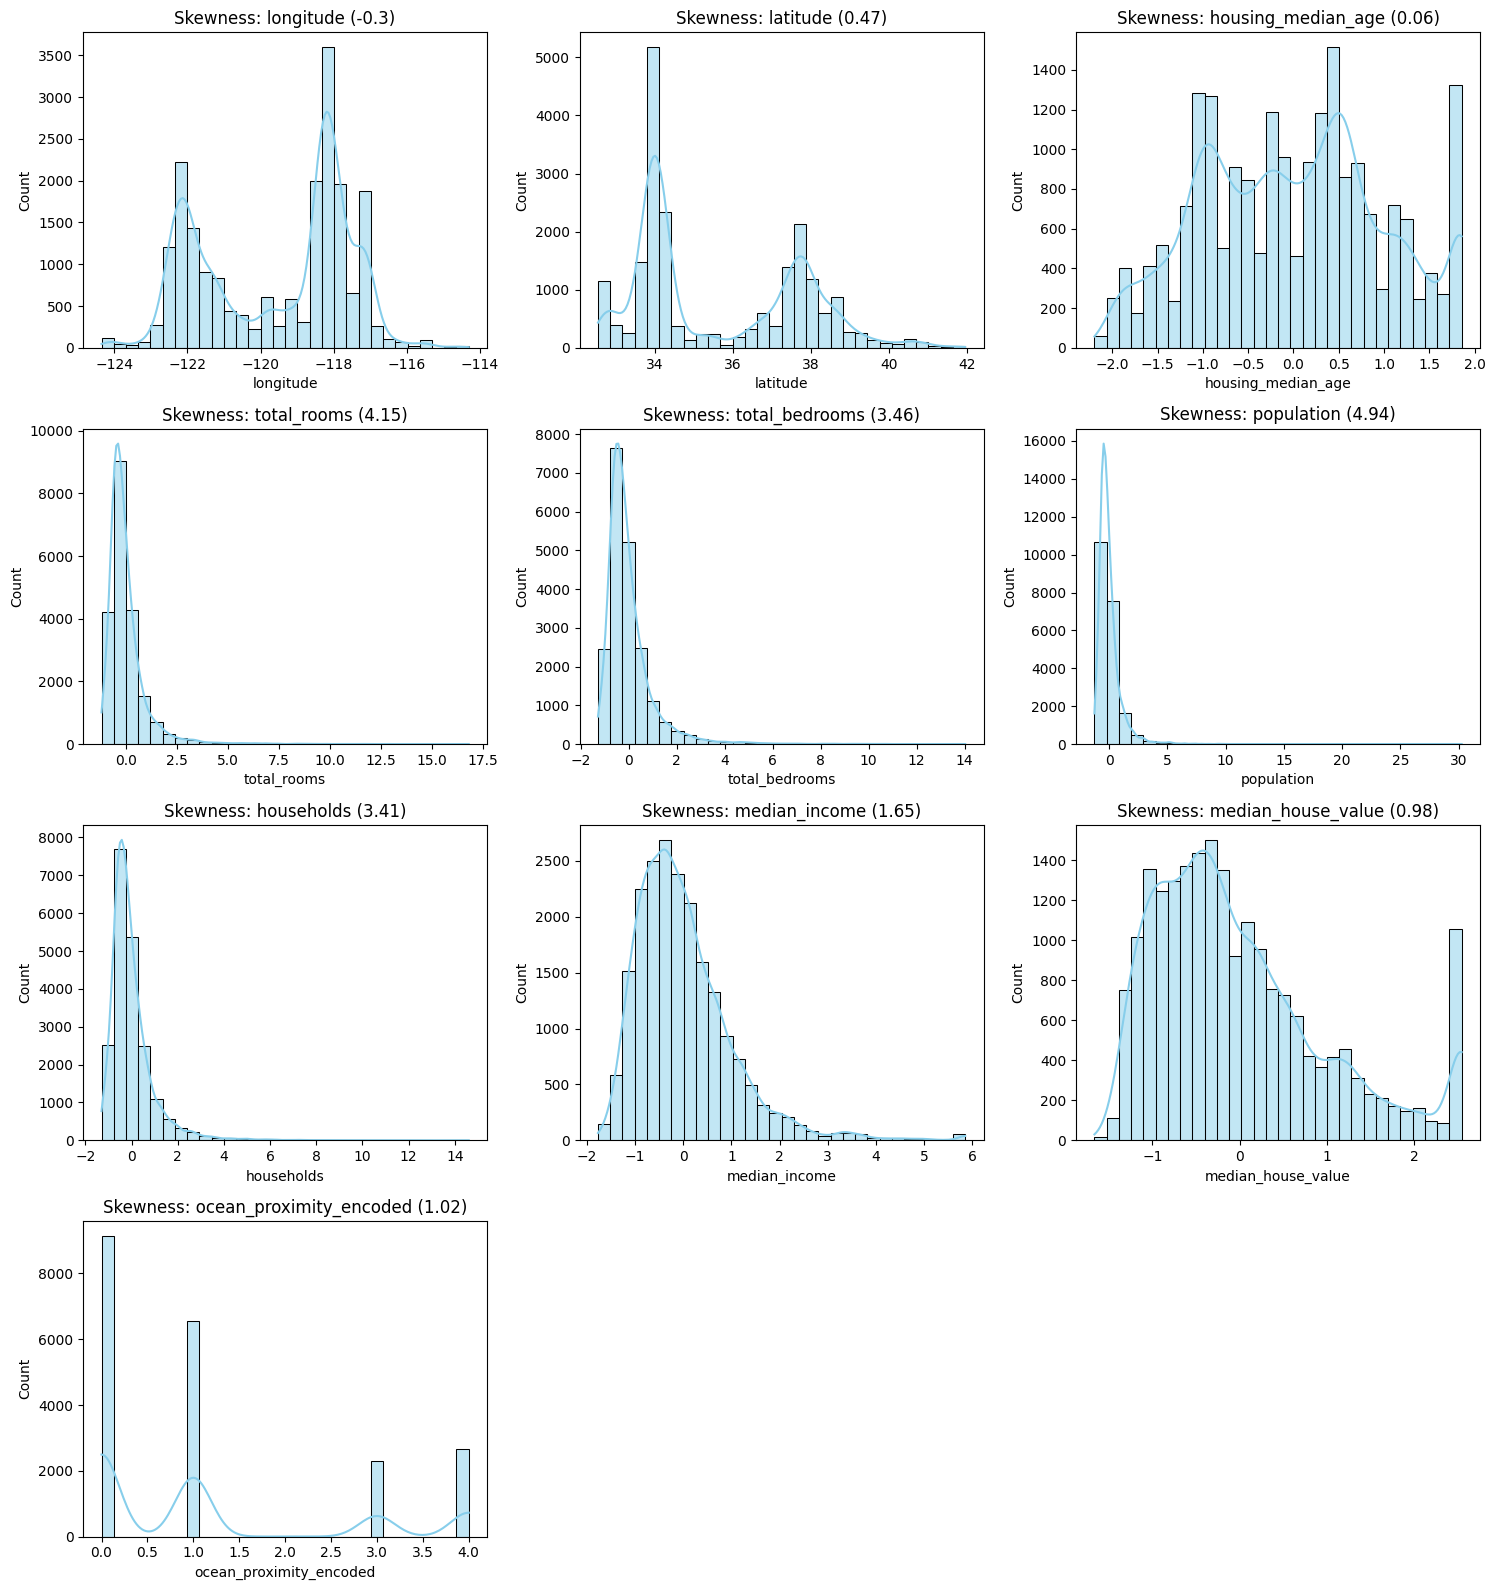

In [ ]:
num_cols1 = df_transformed.select_dtypes(include=["float64", "int64"]).columns

# Define grid size dynamically
num_features = len(num_cols1)
rows = math.ceil(num_features / 3)  # Auto adjust rows
cols = min(3, num_features)  # Max 3 columns per row

# Plot histograms with KDE
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Skewness: {col} ({round(skewness[col], 2)})")

plt.tight_layout()
plt.show()